In [32]:
import string
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [33]:
df = pd.read_csv("/content/Language Detection.csv")

In [34]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [35]:
# shape of the dataset
df.shape

(10337, 2)

In [53]:
# classes in Language column
df["Language"].unique()


array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [52]:
print(len(df["Language"].unique()))

17


This dataset is not clean we need to clean it up. This data is not clean. It has punctuation(colons, dots, commas, brackets, etc) which is not necessary

**We can use punctuation module within string library for this**

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Since some words are in uppercase and others in lowercase, lets convert all the characters to lowercase.

In [6]:
"My name is tony".replace(" ", "")

'Mynameistony'

In [7]:
"TONY".lower()

'tony'

In [16]:
def remove_punctuation(text):
  for pun in string.punctuation:
    text = text.replace(pun,"")
  text = text.lower()
  return text


In [17]:
remove_punctuation('"Nat%ure" can re;fer to/ the &phen@omena ~of the phy...')

'nature can refer to the phenomena of the phy'

In [19]:
df["Text"] = df["Text"].apply(remove_punctuation)

In [20]:
df.head()

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,1 the word nature is borrowed from the old fre...,English


Splitting data into features and target

In [39]:
X = df["Text"]
y = df["Language"]

In [40]:
X

,Text
0,"Nature, in the broadest sense, is the natural..."
1,"""Nature"" can refer to the phenomena of the phy..."
2,"The study of nature is a large, if not the onl..."
3,"Although humans are part of nature, human acti..."
4,[1] The word nature is borrowed from the Old F...
...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [41]:
y

,Language
0,English
1,English
2,English
3,English
4,English
...,...
10332,Kannada
10333,Kannada
10334,Kannada
10335,Kannada


Train Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [44]:
print(X_train.shape, X_test.shape)

(8269,) (2068,)


Problem: model can't understand string values

So, now we use vectorisation to convert string to vectors which can be understood by the model. Unigram, Bigram, Tf-Idf Vectoriser

In [54]:
from sklearn import feature_extraction

In [55]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), analyzer="char")

In [58]:
from sklearn import pipeline
from sklearn import linear_model

In [80]:
model_pipe = pipeline.Pipeline([("vec", vec), ("clf", linear_model.LogisticRegression())])
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [67]:
model_pipe.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [73]:
from sklearn.metrics import accuracy_score

In [75]:
y_train_pred = model_pipe.predict(X_train)

In [79]:
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)*100
print(accuracy_on_train_data)

99.00834441891402


In [72]:
y_test_pred = model_pipe.predict(X_test)

In [77]:
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)*100
print(accuracy_on_test_data)

97.24371373307544


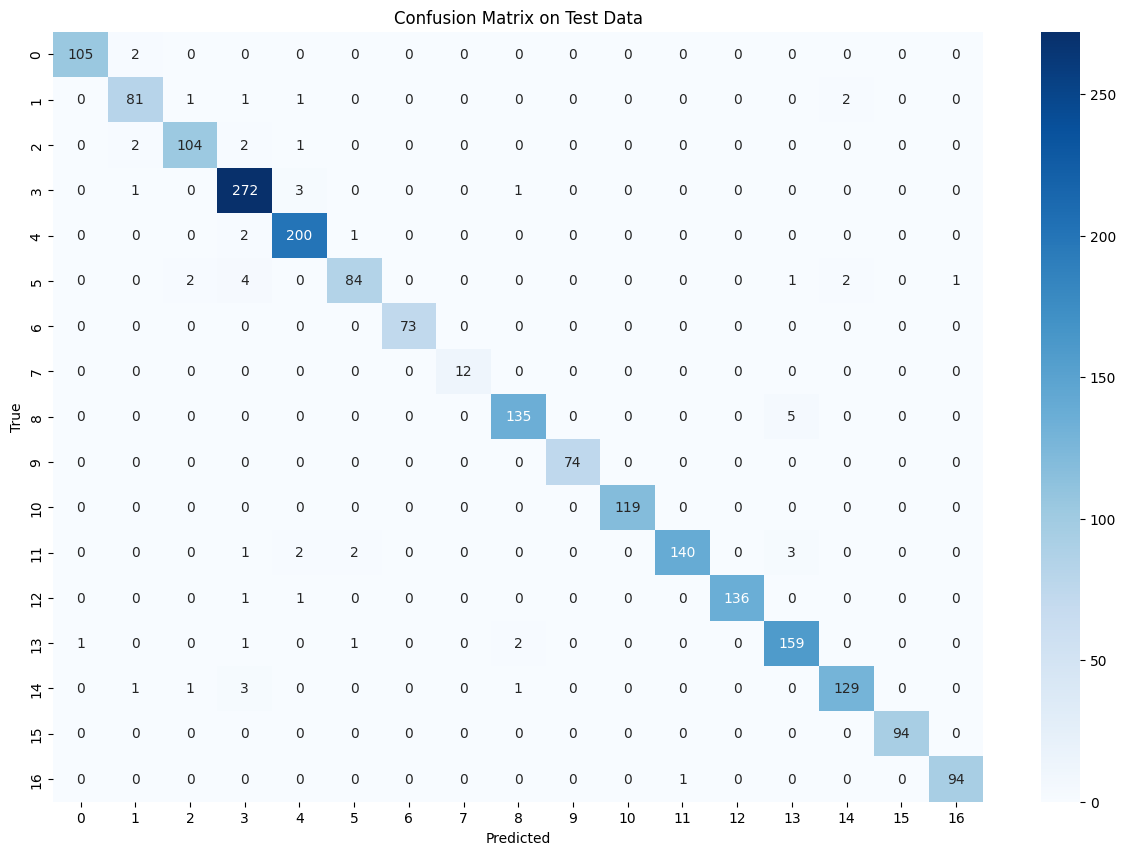

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

In [89]:
model_pipe.predict(["My name is Tony.", "आज का दिन बहुत सुहाना है।", "Je suis étudiant.", "Yo soy estudiante.", "Ich bin Student."," நான் மாணவன்.", "ನಾನು ವಿದ್ಯಾರ್ಥಿ."])

array(['English', 'Hindi', 'French', 'Spanish', 'German', 'Tamil',
       'Kannada'], dtype=object)

**Saving model as a pickel file**

In [95]:
import pickle
newfile = open("language_detection_model.pckl", "wb")

In [96]:
pickle.dump(model_pipe, newfile)
newfile.close()

In [97]:
import os
os.listdir()

['.config',
 'language_detection_model.pckl',
 'Language Detection.csv',
 '.ipynb_checkpoints',
 'sample_data']